<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
# Step 2: Examine the Structure of the Data
print("Shape of the dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types and summary:\n")
df.info()


Shape of the dataset: (65437, 114)

Column names:
 ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyn

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [5]:
# Step 3: Handle Missing Data
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

# Option: Drop rows with missing values in key columns (e.g., JobSat, Employment)
df_cleaned = df.dropna(subset=['JobSat', 'Employment', 'YearsCodePro'])

# Optional: Fill missing 'YearsCodePro' with mode or mean if you'd rather impute
# df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].mode()[0])


Missing values per column:
 RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [6]:
# Step 4: Analyze Key Columns
print("\nEmployment Distribution:\n", df_cleaned['Employment'].value_counts())
print("\nJob Satisfaction Distribution:\n", df_cleaned['JobSat'].value_counts())
print("\nYears of Professional Coding Experience:\n", df_cleaned['YearsCodePro'].value_counts())



Employment Distribution:
 Employment
Employed, full-time                                                                                                                           21903
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                       2231
Independent contractor, freelancer, or self-employed                                                                                           1242
Employed, part-time                                                                                                                             531
Employed, full-time;Student, part-time                                                                                                          488
                                                                                                                                              ...  
Student, full-time;Independent contractor, freelancer, or self-employed;No

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


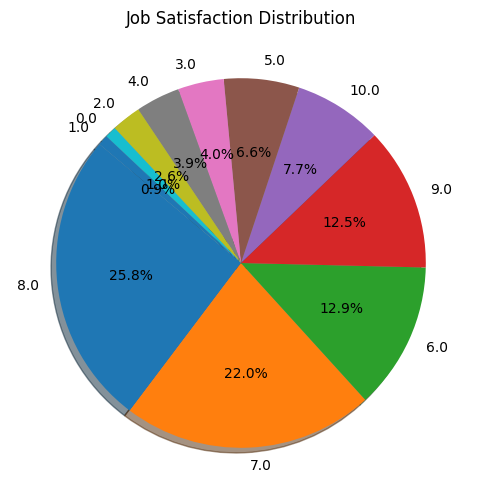

In [7]:
# Step 5: Visualize Job Satisfaction
plt.figure(figsize=(8,6))
df_cleaned['JobSat'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Job Satisfaction Distribution')
plt.ylabel('')
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


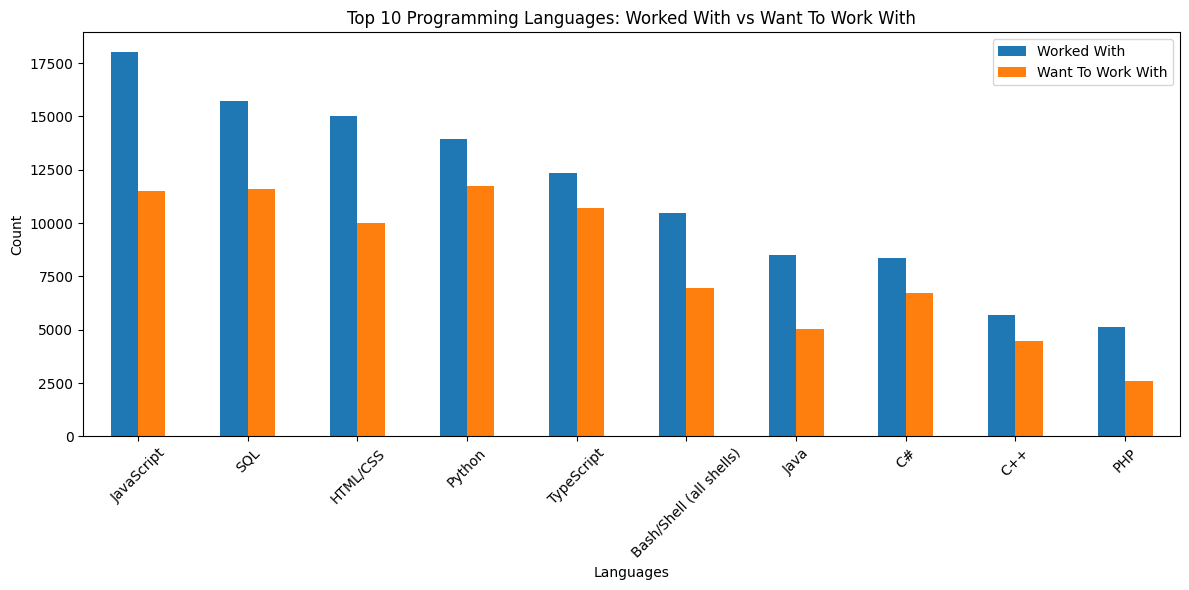

In [8]:
# Step 6: Programming Languages Analysis
from collections import Counter

# Helper to count individual languages from multi-answer columns
def get_language_counts(column):
    all_languages = df_cleaned[column].dropna().str.split(';')
    return Counter(lang for sublist in all_languages for lang in sublist)

worked_with = get_language_counts('LanguageHaveWorkedWith')
want_to_work_with = get_language_counts('LanguageWantToWorkWith')

# Convert to DataFrame
lang_df = pd.DataFrame({
    'Worked With': pd.Series(worked_with),
    'Want To Work With': pd.Series(want_to_work_with)
}).fillna(0).astype(int)

# Sort and plot
lang_df_sorted = lang_df.sort_values(by='Worked With', ascending=False).head(10)
lang_df_sorted.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Programming Languages: Worked With vs Want To Work With')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


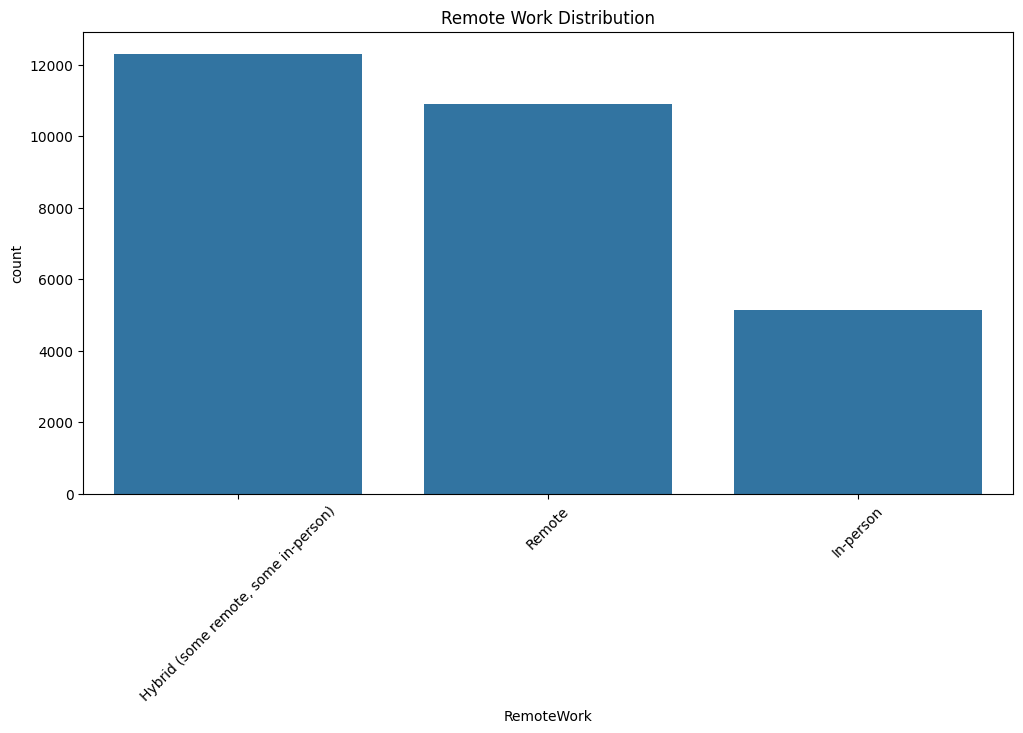

In [9]:
# Step 7: Analyze Remote Work Trends
plt.figure(figsize=(12,6))
sns.countplot(data=df_cleaned, x='RemoteWork', order=df_cleaned['RemoteWork'].value_counts().index)
plt.title('Remote Work Distribution')
plt.xticks(rotation=45)
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.



Spearman Correlation between Experience and Job Satisfaction:
                  YearsCodeProNum  JobSatNum
YearsCodeProNum              1.0        NaN
JobSatNum                    NaN        NaN


/var/folders/j1/hh8wblxx5g7000xwt_wbc6xw0000gn/T/ipykernel_18485/368750328.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YearsCodeProNum'] = df_cleaned['YearsCodePro'].apply(convert_experience)


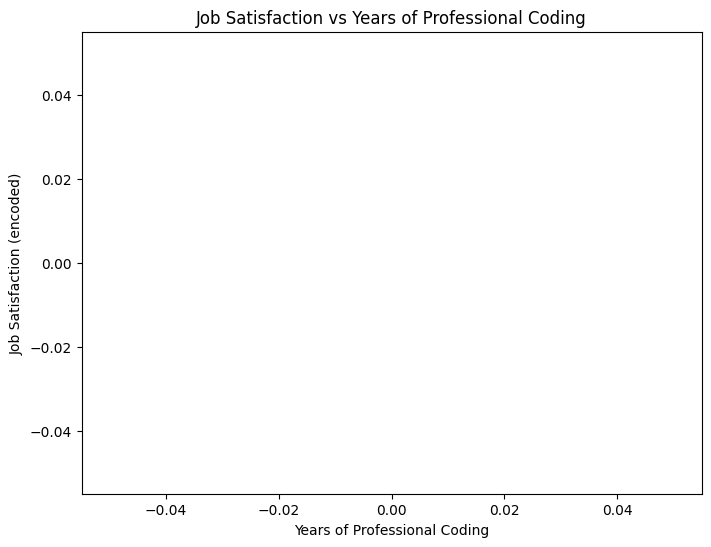

In [10]:
# Step 8: Correlation between Job Satisfaction and Experience

# Convert YearsCodePro to numeric (e.g., "Less than 1 year" → 0, "More than 50 years" → 51)
def convert_experience(val):
    if val == 'Less than 1 year':
        return 0
    elif val == 'More than 50 years':
        return 51
    try:
        return float(val)
    except:
        return None

df_cleaned['YearsCodeProNum'] = df_cleaned['YearsCodePro'].apply(convert_experience)

# Drop rows with invalid conversions
df_cleaned = df_cleaned.dropna(subset=['YearsCodeProNum'])

# Encode JobSat to numeric scale for correlation
job_sat_map = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df_cleaned['JobSatNum'] = df_cleaned['JobSat'].map(job_sat_map)

# Calculate correlation
corr = df_cleaned[['YearsCodeProNum', 'JobSatNum']].corr(method='spearman')
print("\nSpearman Correlation between Experience and Job Satisfaction:\n", corr)

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned, x='YearsCodeProNum', y='JobSatNum')
plt.title('Job Satisfaction vs Years of Professional Coding')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Job Satisfaction (encoded)')
plt.show()


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/var/folders/j1/hh8wblxx5g7000xwt_wbc6xw0000gn/T/ipykernel_18485/3756501783.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


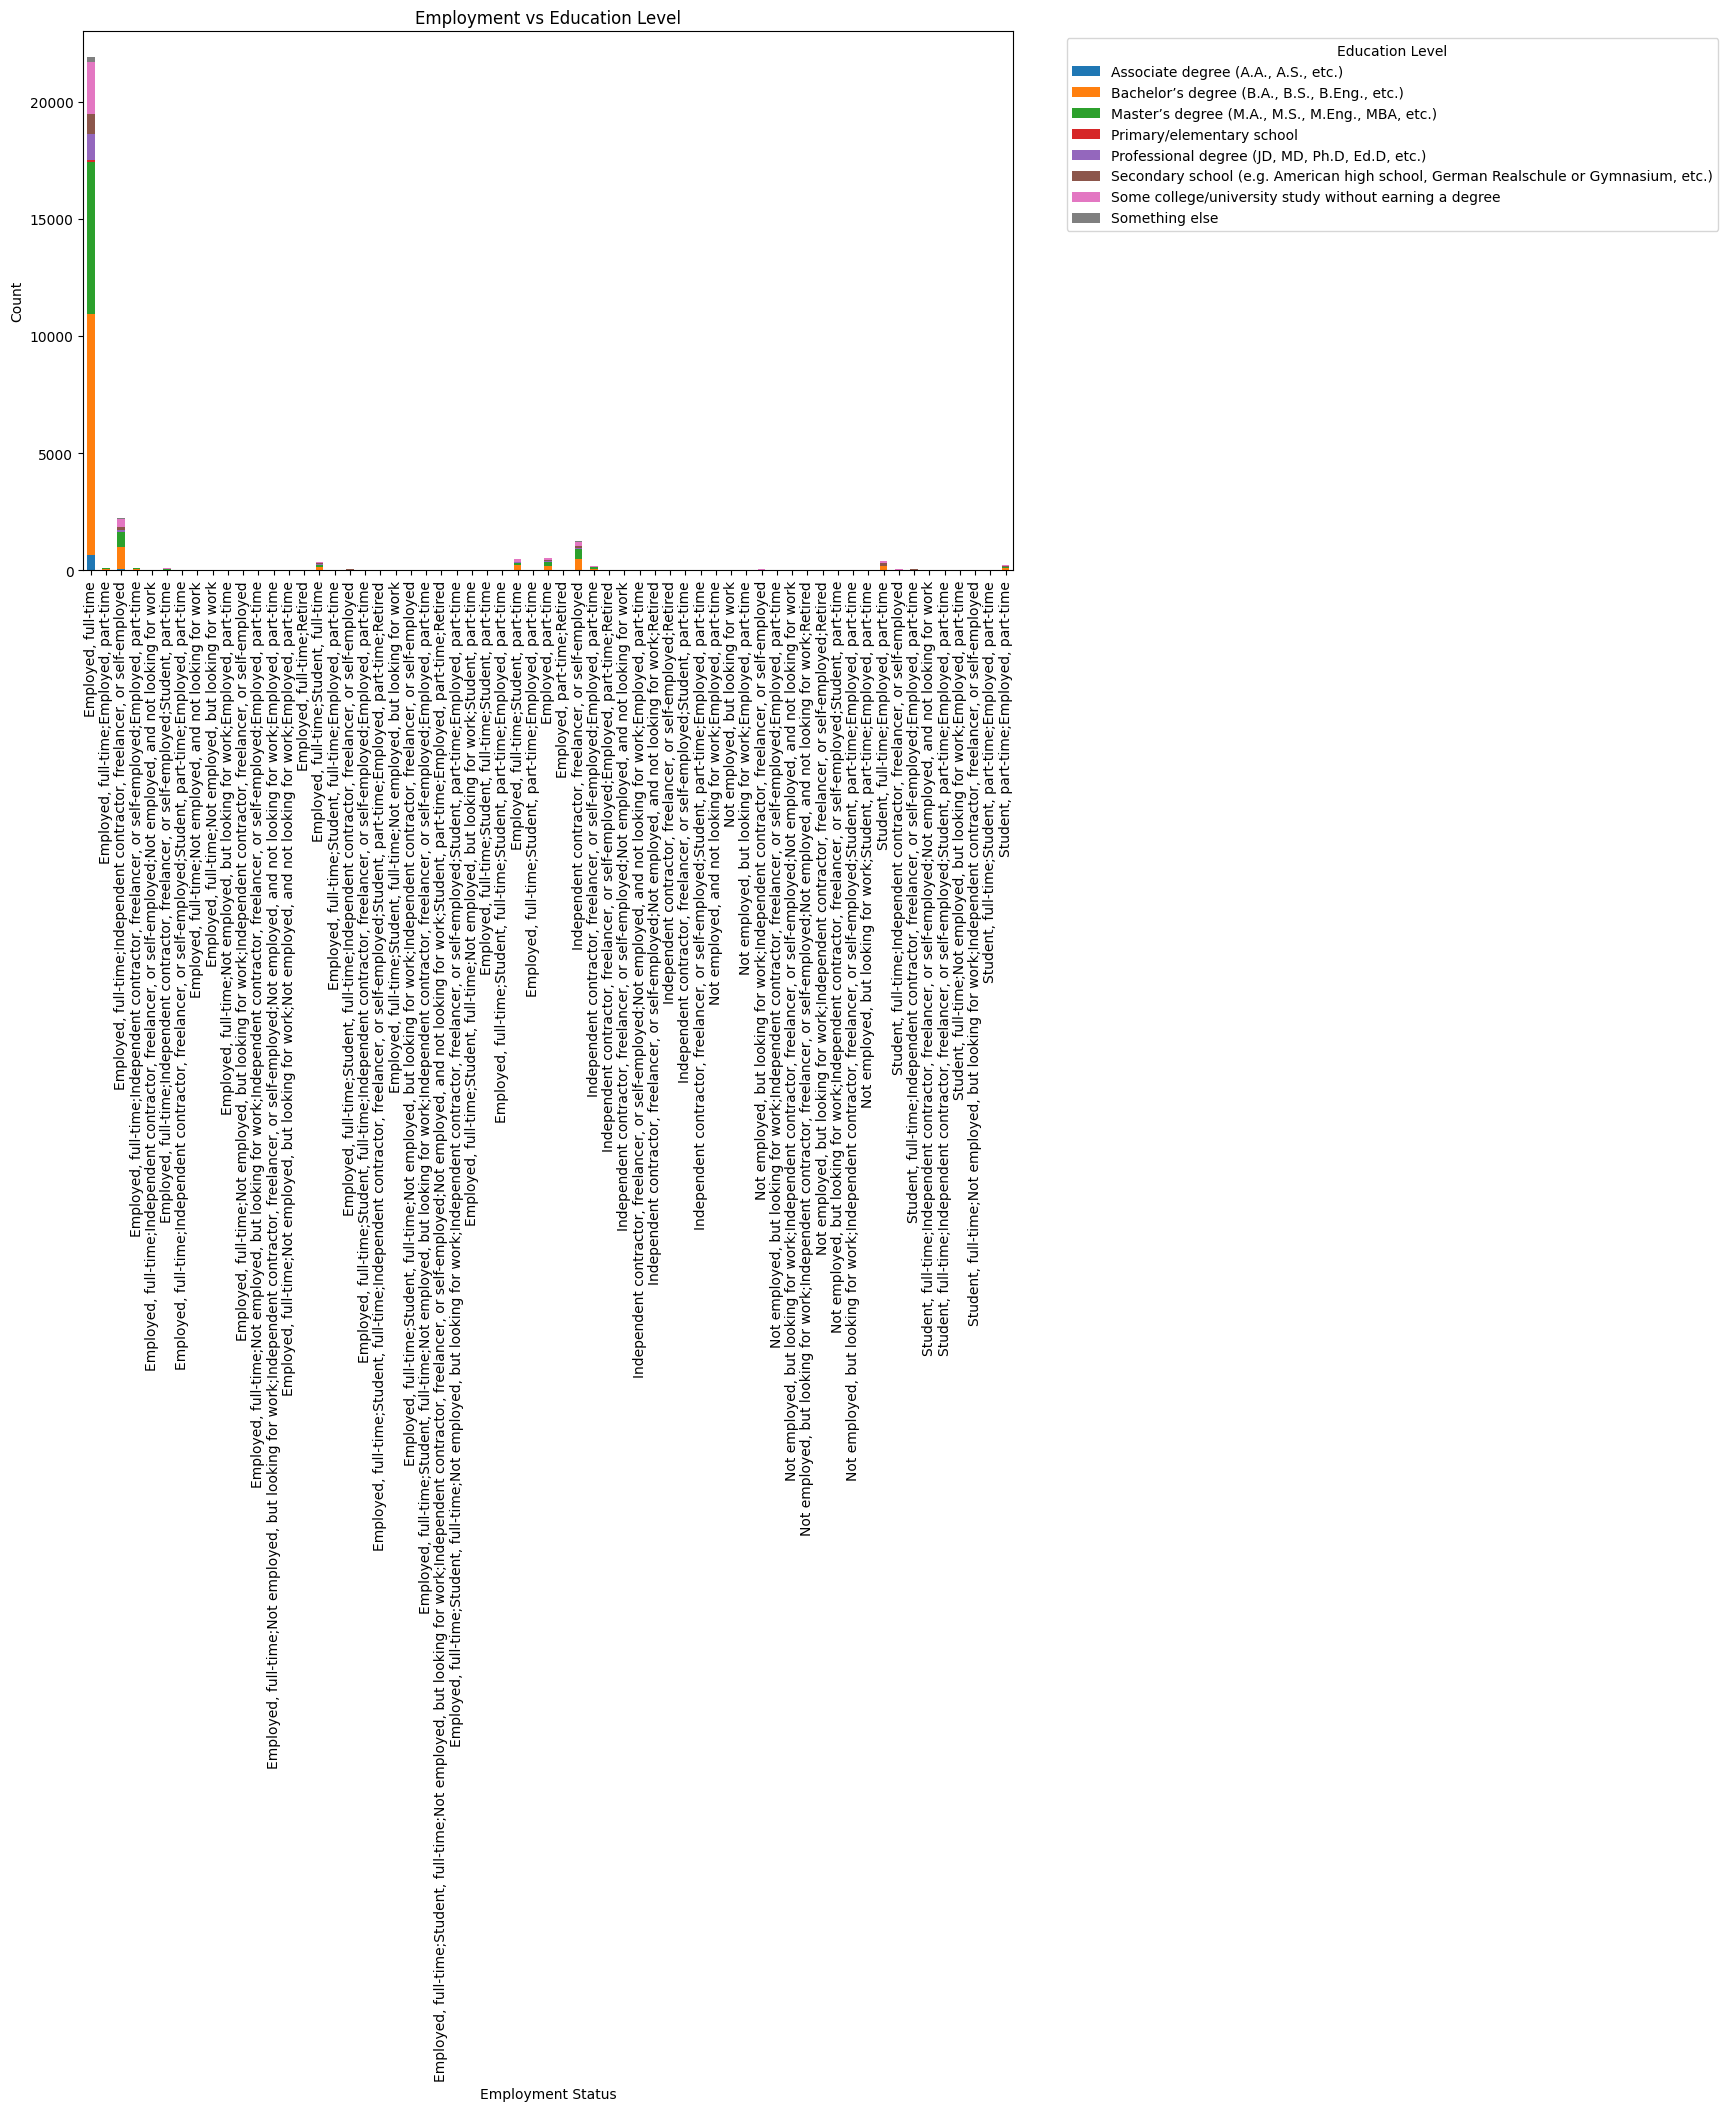

In [11]:
# Step 9: Cross-tabulation Analysis (Employment vs EdLevel)
crosstab = pd.crosstab(df_cleaned['Employment'], df_cleaned['EdLevel'])

# Plotting the crosstab
crosstab.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Employment vs Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [12]:
# Step 10: Export Cleaned Data
df_cleaned.to_csv('cleaned_survey_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_survey_data.csv'")


Cleaned dataset saved as 'cleaned_survey_data.csv'


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
